# 1. Data Preprocessing and Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/ADV Fall2023/Project/dataset/djia.csv'
df = pd.read_csv(dataset_path)

In [ ]:
# Define a function to clean the headlines
def clean_headline(headline):
    # Check if the entry is a string
    if isinstance(headline, str):
        # Remove 'b'' or 'b"' from the start of a string
        if headline.startswith("b'") or headline.startswith('b"'):
            return headline[2:]
    return headline

# Apply this function to each headline column
for col in df.columns[2:27]:
    df[col] = df[col].apply(clean_headline)

In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,Georgia Invades South Ossetia - if Russia gets...,Al-Qaeda Faces Islamist Backlash',"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,"Olympic opening ceremony fireworks 'faked'""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggressi...,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer',War in South Ossetia [PICS]',Israeli Physicians Group Condemns State Torture',Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,"Russia 'ends Georgia operation'""","""If we had no sexual harassment we would have ...",Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the W...,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right',"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two'",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection',All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?',BBC NEWS | Asia-Pacific | Extinction 'by man n...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,Russian forces sink Georgian ships ',...,Elephants extinct by 2020?',US humanitarian missions soon in Georgia - if ...,"Georgia's DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice',Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it,

The 'Label' contains 2 values:
- "1" when DJIA Adj Close value rose or stayed as the same;
- "0" when DJIA Adj Close value decreased.

In [ ]:
# Check for missing values
print(df.isnull().sum())

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Aggregating news headlines into a single text for each date
# This is necessary to analyze the overall sentiment for each day
df['combined_news'] = df.iloc[:, 2:27].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

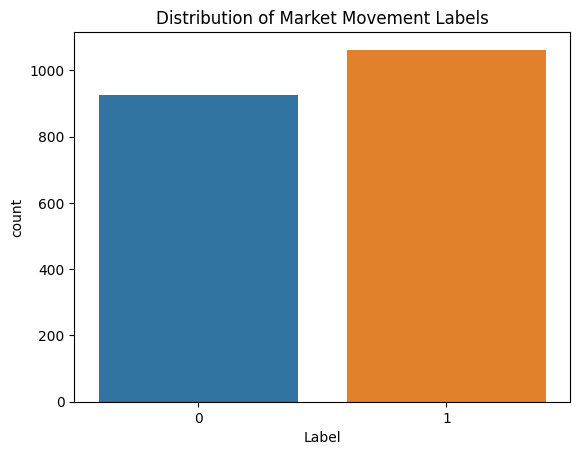

In [ ]:
# Distribution of the stock market movement label
sns.countplot(x='Label', data=df)
plt.title('Distribution of Market Movement Labels')
plt.show()


# 2. Sentiment Analysis Model Development

## 2.1 Sentiment Labeling
Employ an existing sentiment analysis model to label each headline as positive, negative, or neutral.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment label
def get_sentiment_label(headline):
    sentiment_score = sia.polarity_scores(headline)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each headline
df['sentiment_label'] = df['combined_news'].apply(get_sentiment_label)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news,sentiment_label
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"No Help for Mexico's Kidnapping Surge""",Georgia 'downs two Russian warplanes' as count...,negative
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,"Olympic opening ceremony fireworks 'faked'""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer',War in South Ossetia [PICS]',Israeli Physicians Group Condemns State Torture',Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...,Why wont America and Nato help us? If they won...,negative
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,"Russia 'ends Georgia operation'""","""If we had no sexual harassment we would have ...",Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the W...,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,...,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two'",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection',All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?',BBC NEWS | Asia-Pacific | Extinction 'by man n...,Remember that adorable 9-year-old who sang at ...,negative
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,"Britain\'s policy of being tough on drugs is ""...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russia'...,Russian forces sink Georgian ships ',...,"Georgia's DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice',Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...,U.S. refuses Israel weapons to attack Iran: r...,negative
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia - 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random House's Refusal to Pub...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,War in the Caucasus is as much the product of ...,"""Non-media"" photos of South Ossetia/Georg

## 2.2 Feature Extraction
Tokenize the headlines and convert them to numerical format using word embeddings.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization and converting headlines to sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['combined_news'])
sequences = tokenizer.texts_to_sequences(df['combined_news'])

# Padding sequences to have the same length
max_sequence_length = 200  # This can be adjusted
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 3. Integrating Attention Mechanism with LSTM
The LSTM layer will capture the temporal dependencies in the sequence of headlines, while the attention layer will highlight key phrases or words predictive of market movements.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout, Activation, Concatenate, Permute, Dot, Multiply, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

In [ ]:
texts = df['combined_news']  # text data
labels = df['Label']  # labels

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = 200  # Adjust based on your text data
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Prepare labels
y = to_categorical(labels, num_classes=2)  # Binary classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define Attention Mechanism
def attention_layer(inputs, time_steps):
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return Flatten()(output_attention_mul)

In [ ]:
# Build LSTM Model with Attention
embedding_dim = 128

input_layer = Input(shape=(max_sequence_length,))
x = Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_sequence_length)(input_layer)
x = LSTM(64, return_sequences=True)(x)  # LSTM layer
x = Dropout(0.5)(x)
x = attention_layer(x, max_sequence_length)  # Attention layer
x = Dense(64, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)  # Binary classification

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 200, 128)             640000    ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 (None, 200, 64)              49408     ['embedding[0][0]']           
                                                                                                  
 dropout (Dropout)           (None, 200, 64)              0         ['lstm[0][0]']                
                                                                                              

In [ ]:
# Train the model
batch_size = 64  # Adjust as needed
num_epochs = 30  # Adjust as needed

model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 15s 606ms/step - loss: 0.0176 - accuracy: 0.9975 - val_loss: 3.3875 - val_accuracy: 0.5402
Epoch 2/30
25/25 [==============================] - 8s 312ms/step - loss: 0.0199 - accuracy: 0.9956 - val_loss: 3.0203 - val_accuracy: 0.5302
Epoch 3/30
25/25 [==============================] - 13s 525ms/step - loss: 0.0134 - accuracy: 0.9975 - val_loss: 3.2867 - val_accuracy: 0.5427
Epoch 4/30
25/25 [==============================] - 8s 313ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 3.1899 - val_accuracy: 0.5226
Epoch 5/30
25/25 [==============================] - 14s 565ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.3918 - val_accuracy: 0.5352
Epoch 6/30
25/25 [==============================] - 14s 567ms/step - loss: 0.0218 - accuracy: 0.9924 - val_loss: 2.3753 - val_accuracy: 0.5302
Epoch 7/30
25/25 [==============================] - 8s 310ms/step - loss: 0.0353 - accuracy: 0.9861 - val_loss: 2.9523 - val_accuracy: 0.5402
Ep

# 4. Correlating Sentiment with Market Movements

## 4.1 Aggregated Sentiment Analysis
Aggregate the count of each sentiment label for each day to assess the overall sentiment trend.

In [ ]:
# Convert 'Date' to datetime for easier handling
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sentiment labels by date
daily_sentiment_count = df.groupby(['Date', 'sentiment_label']).size().unstack(fill_value=0).reset_index()

## 4.2 Preparing Stock Market Movement Data
Prepare the stock market movement data by selecting the label for each day.

In [ ]:
# Select the stock movement label for each date
daily_market_movement = df.groupby('Date')['Label'].first().reset_index()

## 4.3 Preparing Data for Correlation Analysis

In [ ]:
daily_sentiment_count['sentiment_score'] = daily_sentiment_count['positive'] - daily_sentiment_count['negative']

## 4.4 Correlation Analysis
Correlate the calculated sentiment scores with stock market movements.

In [ ]:
# Merge the sentiment data with the stock market data
merged_data = pd.merge(daily_sentiment_count, daily_market_movement, on='Date')

# Correlation Analysis
correlation_analysis = merged_data[['sentiment_score', 'Label']].corr()

# Print the correlation matrix
print(correlation_analysis)

                 sentiment_score    Label
sentiment_score          1.00000  0.01035
Label                    0.01035  1.00000


### Interpretation and Implications:
- The extremely low correlation coefficient (0.01035) between sentiment scores and market movements suggests that, based on this analysis, there is no strong evidence to conclude that the sentiment in the news has a significant predictive power on the direction of the stock market (at least for the data and method used).
- This outcome could imply that other factors might be more influential in dictating market movements, or that the relationship between news sentiment and the market is more complex than captured by this simple sentiment scoring method.
- It's also possible that the sentiment expressed in the news headlines doesn't directly translate to market movements, or the impact of sentiment on the market may be delayed or obscured by other market dynamics.

# 5. Key Phrase Identification
Analyze the outputs from the attention mechanism in the LSTM model to identify key phrases or words that significantly influence sentiment prediction. This analysis can provide deeper insights into the specific factors in financial news that affect market movements.

## 5.1 Predict and Extract Attention Weights
Use the trained model to predict on the test set and extract the attention weights.

In [ ]:
# Predict using the model and get attention weights
predictions, attention_weights = model_with_attention.predict(X_test)

13/13 [==============================] - 0s 36ms/step


## 5.2 Analyze Attention Weights for Specific Example
Map the attention weights back to the corresponding words in the text to see which words the model focused on.

In [ ]:
# Choose a specific example from the test set
example_index = 0
example_attention_weights = attention_weights[example_index].flatten()

# Retrieve the corresponding text
example_text = tokenizer.sequences_to_texts([X_test[example_index]])[0].split()

# Pair each word with its attention weight
word_attention_pairs = list(zip(example_text, example_attention_weights))

# Sort the pairs by attention weight in descending order
word_attention_pairs.sort(key=lambda x: x[1], reverse=True)

# Display the top words/phrases by attention weight
print("Top words/phrases by attention weight:")
for word, weight in word_attention_pairs[:10]:  # Adjust the number as needed
    print(f"{word}: {weight}")

Top words/phrases by attention weight:
1: 0.005064993165433407
trillion: 0.005062050651758909
loses: 0.00505839055404067
cost: 0.005056769587099552
washington: 0.0050527420826256275
over: 0.005051247775554657
in: 0.005049488041549921
ahmadinejad: 0.005044777411967516
600: 0.005044667981564999
poll: 0.005042170640081167


### Interpretation of the top words:
1. Numerical and Economic Terms: Words like "trillion," "loses," "cost," and "600" suggest a focus on economic figures and financial outcomes. This could indicate that the model is particularly sensitive to numerical data and economic indicators within the text.
2. Geopolitical Focus: The presence of words like "Washington" and "Ahmadinejad" implies that the model pays attention to geopolitical elements, which often have a significant impact on financial markets.
3. General Terms: Common words like "in" and "over" receiving high attention might indicate either their contextual importance in the specific headline or a potential area for model refinement, as generally, these words might not carry significant standalone sentiment.
4. Specific Context: The word "poll" could be related to market surveys or public opinion, which can be influential in financial contexts.

## 5.3 Additional Analysis: Aggregating Attention Data Across Multiple Headlines
Conduct additional analysis across multiple examples and aggregate the attention data. This will involve aggregating attention weights across multiple headlines and analyzing common patterns or themes.

In [ ]:
# Define a Function to Extract Top Attention Words for Each Headline
def extract_top_attention_words(attention_weights, tokenizer, num_words=10):
    # Extract the top words with the highest attention weights
    top_words = {}
    for i in range(len(attention_weights)):
        # Get the attention weights and corresponding text for the example
        example_attention_weights = attention_weights[i].flatten()
        example_sequence = X_test[i]
        example_text = tokenizer.sequences_to_texts([example_sequence])[0].split()

        # Pair each word with its attention weight and sort
        word_attention_pairs = list(zip(example_text, example_attention_weights))
        word_attention_pairs.sort(key=lambda x: x[1], reverse=True)

        # Store top words for this example
        for word, weight in word_attention_pairs[:num_words]:
            if word in top_words:
                top_words[word].append(weight)
            else:
                top_words[word] = [weight]
    return top_words

In [ ]:
# Apply the Function to the Dataset
top_words_across_headlines = extract_top_attention_words(attention_weights, tokenizer, num_words=10)

In [ ]:
# Aggregate attention weights for each word
aggregated_attention = {word: np.mean(weights) for word, weights in top_words_across_headlines.items()}

# Sort words by their average attention weight
sorted_aggregated_attention = sorted(aggregated_attention.items(), key=lambda item: item[1], reverse=True)

# Print top words across all headlines
print("Top words across all headlines by average attention weight:")
for word, avg_weight in sorted_aggregated_attention[:10]:  # Adjust number as needed
    print(f"{word}: {avg_weight}")

Top words across all headlines by average attention weight:
halt: 0.005085476208478212
putting: 0.005078265909105539
mideast: 0.0050744726322591305
netherlands: 0.005072152707725763
territorial: 0.005071746185421944
profits: 0.005070660263299942
opportunity: 0.005069710314273834
anonymous: 0.00506800739094615
net: 0.005067981313914061
emissions: 0.005067047663033009


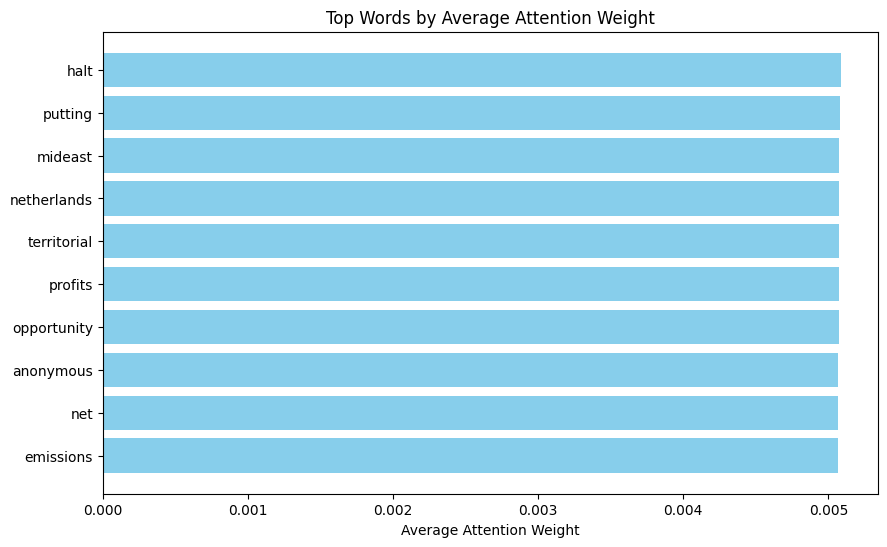

In [4]:
# Visualize results
import matplotlib.pyplot as plt

# Top words and their attention weights
words = ["halt", "putting", "mideast", "netherlands", "territorial",
         "profits", "opportunity", "anonymous", "net", "emissions"]
weights = [0.005085476208478212, 0.005078265909105539, 0.0050744726322591305,
           0.005072152707725763, 0.005071746185421944, 0.005070660263299942,
           0.005069710314273834, 0.00506800739094615, 0.005067981313914061,
           0.005067047663033009]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.barh(words, weights, color='skyblue')
plt.xlabel('Average Attention Weight')
plt.title('Top Words by Average Attention Weight')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

### Interpreation of the top words
1. Economic Actions and Decisions: Words like "halt" and "putting" indicate a focus on significant actions or decisions impacting markets or businesses, suggesting that the model is attuned to dynamics involving stops, pauses, or strategic moves in the business world.

2. Geopolitical and Regional Importance: The attention given to "mideast" and "netherlands" underscores the model's sensitivity to geopolitical factors and specific regional developments. These regions may be highlighted due to their economic significance or specific events impacting global markets.

3. Financial Performance and Opportunities: The prominence of words like "profits" and "opportunity" reflects a focus on financial outcomes and potential gains, core aspects of market analysis and investment decision-making.

4. Geopolitical Issues: The term "territorial" suggests attention to geopolitical tensions or disputes, which can significantly affect market sentiments and economic stability.

5. Anonymity and Uncertainty: The word "anonymous" could point to the model picking up on news related to undisclosed information or anonymous sources, highlighting the market's sensitivity to uncertainty or unverified information.

6. Environmental Concerns: The presence of "emissions" indicates the model's recognition of the growing importance of environmental factors in financial news, which can influence investor behavior and corporate strategies.

The diversity in these key terms suggests that the model effectively captures a wide range of factors — from direct financial indicators to broader economic, geopolitical, and environmental themes — all of which can play a crucial role in shaping market sentiments. This analysis offers valuable insights into the complex interplay of factors driving market sentiments and can inform further refinements to enhance the model's predictive accuracy and relevance in financial sentiment analysis.

# 6. Model Evaluation and Refinement

## 6.1 Performance Metrics
Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical

# Assuming 'predictions' are the output from your model
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5050251256281407
Precision: 0.4830945015289476
Recall: 0.5050251256281407
F1 Score: 0.45773186382240266


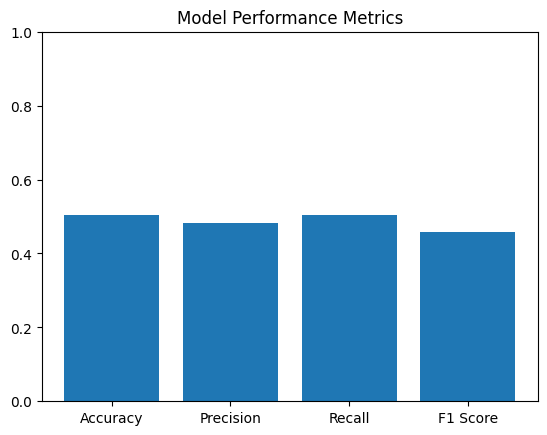

In [2]:
# Visualize results
import matplotlib.pyplot as plt

metrics = {'Accuracy': 0.505, 'Precision': 0.483, 'Recall': 0.505, 'F1 Score': 0.457}
names = list(metrics.keys())
values = list(metrics.values())

plt.bar(names, values)
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.show()

### Performance Metrics Interpretation
- Accuracy (50.5%): The model is correct in its predictions about 50.5% of the time. This accuracy is only slightly better than random guessing in a binary classification scenario, indicating that the model is not effectively distinguishing between the two classes.

- Precision (48.3%): Precision measures the accuracy of positive predictions. A precision of 48.3% means that when the model predicts a class, it is correct less than half the time. This suggests a high rate of false positives.

- Recall (50.5%): Recall indicates the model's ability to find all relevant instances in a dataset. The recall being the same as accuracy suggests an even distribution of errors across both classes but also indicates that many relevant instances are likely being missed (false negatives).

- F1 Score (45.7%): The F1 score, which balances precision and recall, is relatively low. This suggests that there is a lack of harmony between precision and recall in the model, reinforcing the indication that the model is struggling to correctly identify and classify instances accurately.

## 6.2 Error Analysis
Examining the instances where the model made incorrect predictions to understand its weaknesses.

In [ ]:
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

In [ ]:
# Filter the DataFrame to only include test set headlines
test_headlines = df.loc[test_indices, 'combined_news']

# Create the error analysis DataFrame
errors_df = pd.DataFrame({
    'True_Label': true_classes,
    'Predicted_Label': predicted_classes,
    'Headline': test_headlines.reset_index(drop=True)  # Reset index to align with the true and predicted labels
})

# Filter out the incorrect predictions
incorrect_predictions = errors_df[errors_df['True_Label'] != errors_df['Predicted_Label']]

# Analyze the top few incorrect predictions
print(incorrect_predictions.head())

   True_Label  Predicted_Label  \
0           1                0   
1           0                1   
2           1                0   
4           0                1   
5           1                0   

                                            Headline  
0  Darkness falls. Berlusconi decree on wiretappi...  
1  Flight traffic in Europe' The party is over in...  
2  Pesticides linked to bee deaths must be banned...  
4  While everyone gets caught up in the details o...  
5  Uruguays neighbor Argentina now considering ma...  
